**Exploring the chances of developing cardiovascular disease of the patient**


**Introduction**

Cardiovascular disease (CVD) refers to the variety of health conditions relating to the heart and blood vessels. Coronary artery disease is the most common cardiovascular disease caused by the buildup of cholesterol deposits in the walls of the arteries. The most prominent predictors have been types of chest pain, sex, along with additional factors such as the level of cholesterol, maximum heart rate and ST depression induced by exercise,(Rodgers et al., 2019).
In specific, research has shown that the sex of the patient is one key predictor, to which females are reported to be at higher risk compared to same age male. This discrepancy can be potentially explained by the hormonal change in female patient, particularly the loss of estrogen (Rodgers et al., 2019). 

Additionally, higher cholesterol level are associated to the increase of possible heart attack and stroke, along with the abnormal level of maximum heart rate and severity of chest pain, which are all indicative of an higher risk of experiencing CVD (Jung et al., 2022).
Moreover, the ST depression induced by exercise examined using ECG is capable of detecting myocardial ischaemia (when the heart does not recieve sufficient amount of oxygen), again suggestive of potential high risk of any heart disease and abnormalities (Lim et al., 2016)


As a result, we can take a closer look into these five factors, to classify whether a patient is at risk of heart disease and answer the question on whether the patient is at high risk of developing cardiovascular disease or not.
The dataset we will use to try to answer this question is the UCI Machine Learning Repository’s Heart Disease Dataset. This dataset includes information on patients related to their cardiovascular health. Key characteristics in this dataset that will be analyzed include the the predictors mentioned above.



**Preliminary exploratory data**

In [5]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**Download the data**

In the exploratory data phase, the data was downloaded from the website, accomplished thourgh the use of "download.file" and function "read.table".
Then, because the data was presented without proper column names, the function of "colnames" was used to add this missing aspects.


In [6]:
#download and upload the dataset 
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

download_path <- "heart_disease.cleveland.data"

download.file(url = url, destfile = download_path, mode = "wb")

heart_data <- read.table(download_path, header = FALSE, sep = ",")
colnames(heart_data) <- c("age", "sex", "cp", "trestbps","chol", "fbs", "restecg", 
              "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num" )
col_types = list("d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "f", "f", "d")

**Methods**

Moving forward from the acquisition of the raw data, in order to answer the predictive questions, there are many variables from the data that we can use to perform the prediction, however based on our group’s research, we have decided on five strongest predictors for cardiovascular disease diagnosis. As a result, we selected the following columns: sex (1 = male, 0 = female), cp (Value 1 - 4), chol (in mg/dl), thalach (max heart rate), oldpeak (ST depression induced by exercise relative to rest) for predictors and num (0 = no diagnosis, 1-4 = possible diagnosis) for the criterion. Some preprocessing we did with the data includes removing the missing values, splitting the data into training and testing sets, as well as grouping the data by diagnosis results.


Moreover, to perform classification, a scatter plot will be used to show the results of the prediction. For instance, we can plot the cholesterol level on the y-axis and maximum heart rate achieved on the x-axis, while color coding each coordinate based on their risk of developing cardiovascular disease (diagnosis).


**Step 1: Data Wrangling**

After successfully reading the data, the subsequent step involves selecting the desired predictive variables, performed using the function "select". Due to the structure of the raw data, the positive cases were spread out from num(1-4), which is inconvenience to analyze.


To address this issue, the data was mutated and turned into a categorical factor type (fct), in order to separate the positive and negative cases into two categories. This step was performed by specifically creating a variable "diag" and assinge its value to be positive exceeded the number zero num(> 0) and negative otherwise.


In [7]:
#cleaned data
heart_tidy <- heart_data|>
                select(thalach, chol, oldpeak, cp, sex, age, num) |> 
                mutate(diagnosis = num > 0) |>
                mutate(diagnosis = as_factor(diagnosis))
heart_tidy

thalach chol oldpeak cp sex age num diagnosis
1   150     233  2.3     1  1   63  0   FALSE    
2   108     286  1.5     4  1   67  2   TRUE     
3   129     229  2.6     4  1   67  1   TRUE     
4   187     250  3.5     3  1   37  0   FALSE    
5   172     204  1.4     2  0   41  0   FALSE    
6   178     236  0.8     2  1   56  0   FALSE    
7   160     268  3.6     4  0   62  3   TRUE     
8   163     354  0.6     4  0   57  0   FALSE    
9   147     254  1.4     4  1   63  2   TRUE     
10  155     203  3.1     4  1   53  1   TRUE     
11  148     192  0.4     4  1   57  0   FALSE    
12  153     294  1.3     2  0   56  0   FALSE    
13  142     256  0.6     3  1   56  2   TRUE     
14  173     263  0.0     2  1   44  0   FALSE    
15  162     199  0.5     3  1   52  0   FALSE    
16  174     168  1.6     3  1   57  0   FALSE    
17  168     229  1.0     2  1   48  1   TRUE     
18  160     239  1.2     4  1   54  0   FALSE    
19  139     275  0.2     3  0   48  0   FALSE    
20  171     266  0.6     2  1   49  0   FALSE    
21  144     211  1.8     1  1   64  0   FALSE    
22  162     283  1.0     1  0   58  0   FALSE    
23  160     284  1.8     2  1   58  1   TRUE     
24  173     224  3.2     3  1   58  3   TRUE     
25  132     206  2.4     4  1   60  4   TRUE     
26  158     219  1.6     3  0   50  0   FALSE    
27  172     340  0.0     3  0   58  0   FALSE    
28  114     226  2.6     1  0   66  0   FALSE    
29  171     247  1.5     4  1   43  0   FALSE    
30  114     167  2.0     4  1   40  3   TRUE     
⋮   ⋮       ⋮    ⋮       ⋮  ⋮   ⋮   ⋮   ⋮        
274 125     149  1.6     4  0   71  0   FALSE    
275 162     204  0.8     1  1   59  1   TRUE     
276 155     227  0.6     1  1   64  0   FALSE    
277 152     278  0.0     3  0   66  0   FALSE    
278 152     220  0.0     3  0   39  0   FALSE    
279 164     232  0.0     2  1   57  1   TRUE     
280 131     197  0.6     4  0   58  0   FALSE    
281 143     335  3.0     4  1   57  2   TRUE     
282 179     253  0.0     3  1   47  0   FALSE    
283 130     205  2.0     4  0   55  3   TRUE     
284 174     192  0.0     2  1   35  0   FALSE    
285 161     203  0.0     4  1   61  2   TRUE     
286 140     318  4.4     4  1   58  4   TRUE     
287 146     225  2.8     4  0   58  2   TRUE     
288 144     220  0.4     2  1   58  0   FALSE    
289 163     221  0.0     2  1   56  0   FALSE    
290 169     240  0.0     2  1   56  0   FALSE    
291 150     212  0.8     3  1   67  1   TRUE     
292 166     342  1.2     2  0   55  0   FALSE    
293 144     169  2.8     4  1   44  2   TRUE     
294 144     187  4.0     4  1   63  2   TRUE     
295 136     197  0.0     4  0   63  1   TRUE     
296 182     157  0.0     2  1   41  0   FALSE    
297  90     176  1.0     4  1   59  3   TRUE     
298 123     241  0.2     4  0   57  1   TRUE     
299 132     264  1.2     1  1   45  1   TRUE     
300 141     193  3.4     4  1   68  2   TRUE     
301 115     131  1.2     4  1   57  3   TRUE     
302 174     236  0.0     2  0   57  1   TRUE     
303 173     175  0.0     3  1   38  0   FALSE

**Step 2: Spliting data and Creating summary table**

Following preprocessing the data, the next step is to split the data for classification purpose. This task is performed by using the function "initial_split" that split the data into training and testing set.

Furthermore, a summary table was created to make sure that the diagnosis of positive and negative were balanced.


In [8]:
#split the data into training and testing set
set.seed(2019)
heart_split <- initial_split(heart_tidy, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

#summary table to have a general sense of diagnosed cases in male and female
heart_sum_table <- heart_train |>
                    group_by(diagnosis) |>
                    summarize(count = n()) |>
                    arrange(-count)
heart_sum_table

heart_sex <- heart_train |>
                group_by(sex) |>
                summarize(number_diagnosis = n())
heart_sex


diagnosis count
1 FALSE     122  
2 TRUE      103

sex number_diagnosis
1 0    69             
2 1   156

**Visualization**

Lastly, after making sure the criterion variable is balanced, several graphs were created to visualize the correlation between the predictive variables and the diagnosis of heart disease.

**Max Heart Rate vs Cholesterol Level**

The first graph below shows the correlation between the two predictors while being color coded to represent either TRUE or FALSE diagnosis. In this case, it seems like the maximum heart rate achieved shows more impact, which higher heart rates have more proportion of of a FALSE diagnosis.
Such an observation is interesting, because that is the opposite findings to the literatures, thus it is worth investigating the possible reasons behind this discrepancy.


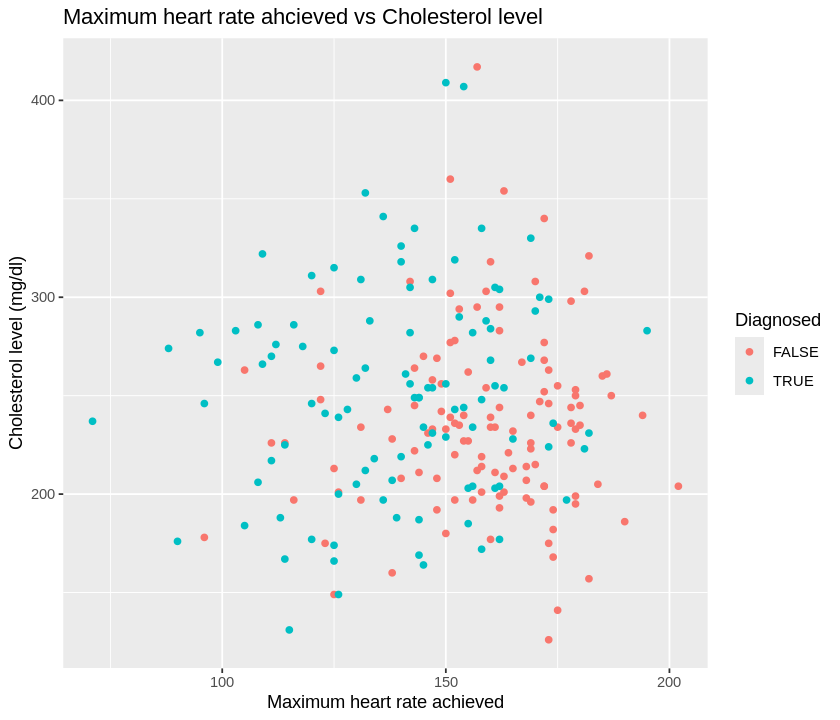

In [10]:
#visualizing some correlation between predictors and the diagnosed cases
set.seed(2019)
options(repr.plot.width = 7, repr.plot.height = 6)

heart_plot1 <- heart_train |>
                ggplot(aes(x = thalach, y = chol, color = diagnosis)) +
                geom_point()+
                labs(x = "Maximum heart rate achieved", y = "Cholesterol level (mg/dl)", color = "Diagnosed") +
                ggtitle("Maximum heart rate ahcieved vs Cholesterol level")
heart_plot1

**ST Depression vs Cholesterol level**

This second graph again shows a rough correlation between the two predictors. Before analyzing the graph, it is first good to know that a higher ST depression refers to the stress the heart undertakes during exercise vs. rest. A higher value suggests that the heart is not receiving adequate blood when it is under stress. Although there seems to be a large number of points where ST depression is 0, as ST depression increases, the amount of TRUE cases seems to also increase. This could indicate ST depression may have an effect on a heart disease diagnosis.

It’s hard to tell if there’s a relationship between cholesterol levels and a positive diagnosis but when taking into account the many points where ST depression is 0, there are many TRUE cases that exist there. This could possibly point towards cholesterol levels having an effect on a positive diagnosis. However, solely based on this graph it may be unclear if a high or low cholesterol level contributes to a positive diagnosis.


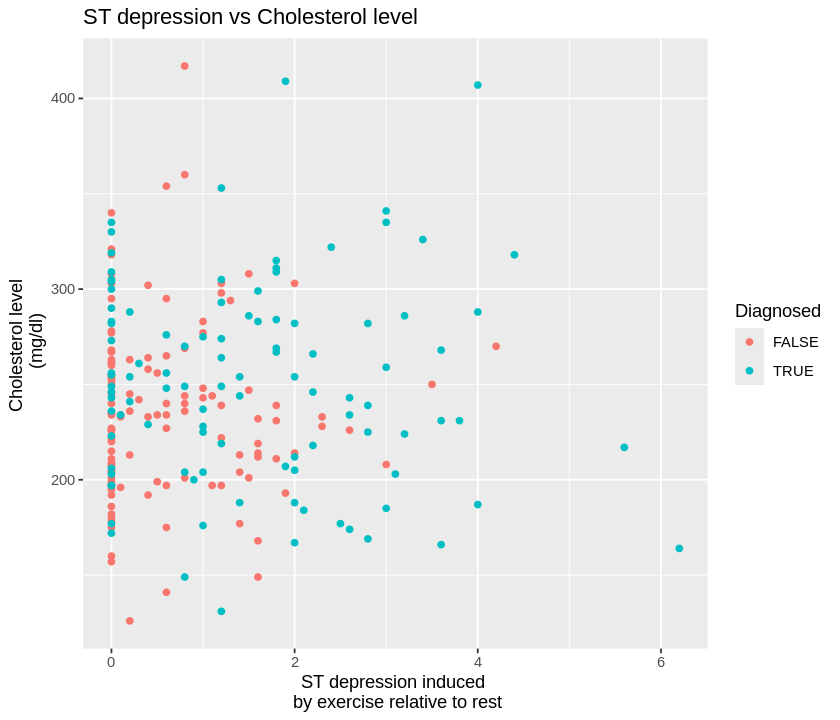

In [11]:
heart_plot2 <- heart_train |>
                ggplot(aes(x = oldpeak, y = chol, color = diagnosis)) +
                geom_point()+
                labs(x = "ST depression induced \n by exercise relative to rest", y = "Cholesterol level \n (mg/dl)", color = "Diagnosed") +
                ggtitle("ST depression vs Cholesterol level")
heart_plot2


**Chest Pain Type**

This following graph presents the four different type of chest pain with the proportion of positive vs negative diagnosis. In this case, the 4th type of chest pain (asymptomatic), which is chest pain without any other symptoms, can be considered a strong predictors of potential risk to develop heart disease.


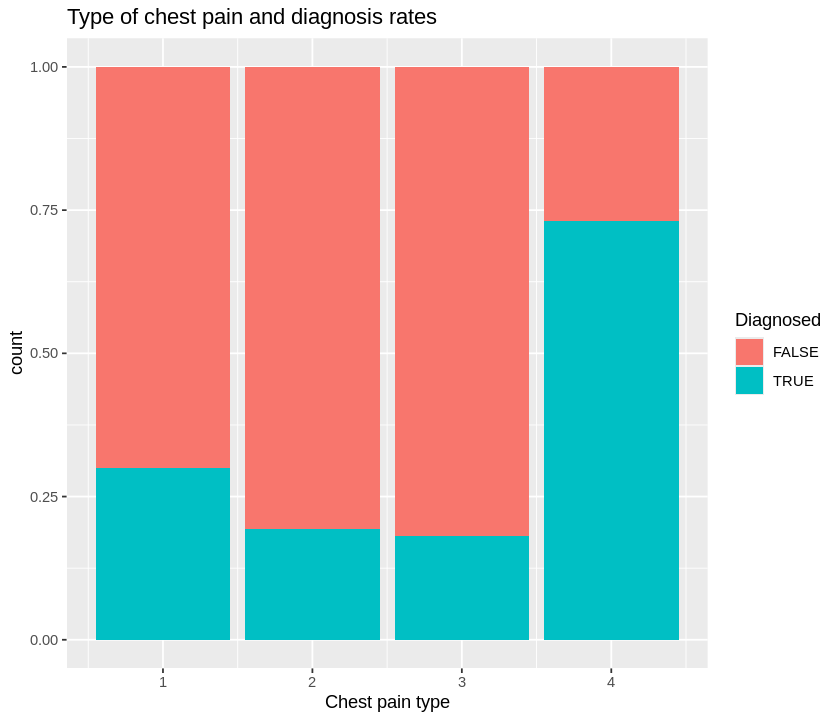

In [12]:
heart_plot3 <- heart_train |>
                ggplot(aes(x = cp, fill = diagnosis))+
                geom_bar(position = "fill")+
                labs(x = "Chest pain type", fill = "Diagnosed")+
                ggtitle("Type of chest pain and diagnosis rates")
heart_plot3



**Age vs Diagnosis**

Again, another graph that shows the correlation between a predictor and the criterion variable. Based on this histogram, we can no longer say that the older one get, the more risk to develope heart disease, because the peak seem to be around mid 50s to 60s, then seem to gradually decrease.
However, there might be other underlying reasons behind, such as around the age of mid 5os, people check their health more oftenly compared to even older folks.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_bar()`).”


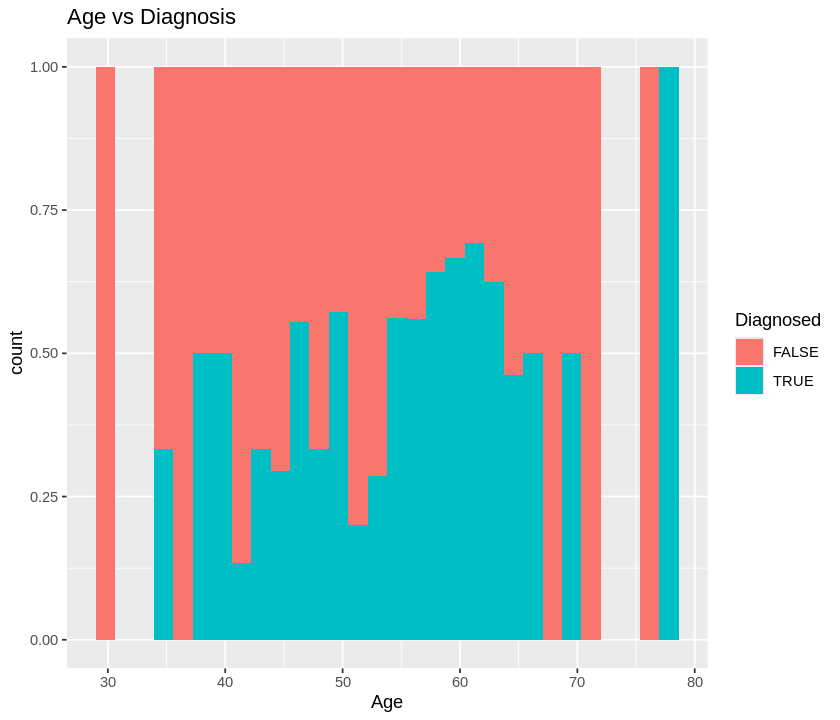

In [13]:
heart_plot4 <- heart_train |>
#                filter(diagnosis == TRUE) |> 
                ggplot(aes(x = age, fill = diagnosis)) +
                geom_histogram(position = "stack")+
                labs(x = "Age", fill = "Diagnosed") +
                ggtitle("Age vs Diagnosis")
heart_plot5 <- heart_train |>
#                filter(diagnosis == TRUE) |> 
                ggplot(aes(x = age, fill = diagnosis)) +
                geom_histogram(position = "fill")+
                labs(x = "Age", fill = "Diagnosed") +
                ggtitle("Age vs Diagnosis")
heart_plot4
heart_plot5


**Expected outcomes and significance**

Based on previous research, we have discovered that the risk of developing CVD is correlated to the sex of the patient, particularly older females are at greater risk compared to men. Moreover, studies have also shown that abnormal levels of cholesterol are also risk factors for developing CVD (Jung et al., 2022). As a result, we expect to find that females with high levels of cholesterol, or patients who have high heart rate are at more risk to develop CVD.
Thus, future questions that can be further explored could be what is the threshold of cholesterol levels that puts a patient at most risk of developing cardiovascular disease.

**Data Analysis**

After examining some relationships between the predictors and criterion, we created three models to examine which of these predictors would produce the highest accuracy.

**Model 1**

**Step 1:** Finding the best "k" value


In [14]:
set.seed(2019)
heart_recipe <- recipe(diagnosis ~., data = heart_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

heart_vfold <- vfold_cv(heart_train, v = 5, strata = diagnosis)
heart_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 2))

heart_fit <- workflow() |>
                add_recipe(heart_recipe) |>
                add_model(heart_spec) |>
                tune_grid(resample = heart_vfold, grid = heart_vals) |>
                collect_metrics()

accuracy_1 <- heart_fit |>
            filter(.metric == "accuracy")

options(repr.plot.width = 7, repr.plot.height = 6)
heart_vals_plot <- accuracy_1 |>
                    ggplot(aes(x = neighbors, y = mean)) +
                    geom_point()+
                    geom_line()+
                    scale_x_continuous(breaks = seq(1, 20, by = 2))+
                    labs(x = "Neighbors", y = "Accuracy of the Model") +
                    ggtitle("Neighbors vs Accuracy of the Model")
heart_vals_plot

**NEIGHBOURS VS. ACCURACY**

Based on the above plot, setting the number of neighours to K = 5 results in the highest accuracy estimate of ~92%. Additionally, using K = 5 is the most optimal for us to use since slightly changing this value (ie. +/- 1) will still provide us with a considerably high accuracy, allowing room for uncertainty. Lastly, K = 5 is not too large of a number where it will create a large cost of training.

**Step 2:** Fitting the selected "k" value


In [15]:
set.seed(2019)
heart_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
                    set_engine("kknn") |>
                    set_mode("classification")
heart_spec_new

heart_fit <- workflow() |>
                add_recipe(heart_recipe) |>
                add_model(heart_spec_new) |>
                fit(data = heart_train)
heart_fit


K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.09333333
Best kernel: rectangular
Best k: 5

**Step 3:** Using the selected "k" neighbors to examine the predicsion of the model


In [16]:
set.seed(2019)
heart_predictions <- predict(heart_fit, heart_test) |>
                     bind_cols(heart_test)
heart_accuracy_1 <- heart_predictions |>
                    metrics(truth = diagnosis, estimate = .pred_class) |>
                    select(.metric,.estimate)|>
head(1)                  
heart_accuracy_1

heart_conf_mat <- heart_predictions |>
                     conf_mat(truth = diagnosis, estimate = .pred_class)
heart_conf_mat


.metric  .estimate
1 accuracy 0.9230769

          Truth
Prediction FALSE TRUE
     FALSE    42    6
     TRUE      0   30

**Actual Prediction Test**

In [17]:
heart_predictions_labels <- heart_predictions |>
                            select(.pred_class)|>
                            bind_cols(heart_test |> select(diagnosis)) |>
                            mutate(seq = 1:nrow(heart_predictions)) |>
                            as.data.frame()
heart_match <- heart_predictions_labels|>
                filter(.pred_class == diagnosis)             
heart_match


.pred_class diagnosis seq
1  TRUE        TRUE       1 
2  FALSE       FALSE      3 
3  FALSE       FALSE      4 
4  TRUE        TRUE       5 
5  TRUE        TRUE       6 
6  FALSE       FALSE      7 
7  FALSE       FALSE      8 
8  TRUE        TRUE       9 
9  FALSE       FALSE     10 
10 FALSE       FALSE     11 
11 TRUE        TRUE      12 
12 FALSE       FALSE     14 
13 TRUE        TRUE      15 
14 FALSE       FALSE     16 
15 TRUE        TRUE      17 
16 TRUE        TRUE      18 
17 FALSE       FALSE     19 
18 FALSE       FALSE     20 
19 FALSE       FALSE     21 
20 TRUE        TRUE      22 
21 TRUE        TRUE      23 
22 FALSE       FALSE     24 
23 FALSE       FALSE     25 
24 FALSE       FALSE     26 
25 TRUE        TRUE      27 
26 TRUE        TRUE      28 
27 TRUE        TRUE      29 
28 FALSE       FALSE     30 
29 FALSE       FALSE     31 
30 FALSE       FALSE     32 
⋮  ⋮           ⋮         ⋮  
43 FALSE       FALSE     46 
44 FALSE       FALSE     47 
45 TRUE        TRUE      48 
46 FALSE       FALSE     49 
47 TRUE        TRUE      50 
48 TRUE        TRUE      51 
49 TRUE        TRUE      52 
50 FALSE       FALSE     53 
51 TRUE        TRUE      54 
52 FALSE       FALSE     55 
53 FALSE       FALSE     56 
54 FALSE       FALSE     58 
55 FALSE       FALSE     59 
56 FALSE       FALSE     60 
57 FALSE       FALSE     61 
58 TRUE        TRUE      62 
59 TRUE        TRUE      63 
60 FALSE       FALSE     64 
61 FALSE       FALSE     65 
62 FALSE       FALSE     66 
63 FALSE       FALSE     67 
64 TRUE        TRUE      68 
65 TRUE        TRUE      69 
66 FALSE       FALSE     70 
67 FALSE       FALSE     71 
68 FALSE       FALSE     72 
69 FALSE       FALSE     74 
70 FALSE       FALSE     75 
71 FALSE       FALSE     77 
72 TRUE        TRUE      78

**Step 4: Precision and Recall**

In [18]:
# Calculate precision, recall, and F1-score
precision <- precision(heart_predictions, truth = diagnosis, estimate = .pred_class)
precision

recall <- recall(heart_predictions, truth = diagnosis, estimate = .pred_class)
recall


.metric   .estimator .estimate
1 precision binary     0.875

.metric .estimator .estimate
1 recall  binary     1

**References**

June, Eugene et al. (2022). Serum Cholesterol Levels and Risk of Cardiovascular Death: A Systematic Review and a Dose-Response Meta-Analysis of Prospective Cohort Studies. National Library of Medicine, 19(14), 1 - 12. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9316578/

Lim, C,Y., Teo, G,S., Poh, K, K. (2016). ST-segment changes with exercise stress, 57(7), 347-353. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4958709/

Rodgers, L, Jennifer et al. (2019). Cardiovascular Risks Associated with Gender and Aging. National Library of Medicine, 6(2), 1- 19. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/

